In [1]:
# ready
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers

In [80]:
# equation


# model
def gen_senquential_model(config):

    if config['hidden_layer'] == 1:
        model = Sequential([
                            Input(3, name='input_layer'),  # input 변수 3개
                            Dense(config['hidden'], activation=config['activation'], name='hidden_layer_1', 
                                  kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42)), 
                            Dense(1, activation='relu', name='output_layer',
                                  kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42))  # output layer
                            ])

    elif config['hidden_layer'] == 2:
        model = Sequential([
                            Input(3, name='input_layer'),  # input 변수 3개
                            Dense(config['hidden'], activation=config['activation'], name='hidden_layer_1', 
                                    kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42)),  
                            Dense(config['hidden']*2, activation=config['activation'], name='hidden_layer_2', 
                                    kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42)),  
                            Dense(1, activation='relu', name='output_layer',
                                    kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42))  # output layer
                            ])
    elif config['hidden_layer'] == 3:
        model = Sequential([
                            Input(3, name='input_layer'),  # input 변수 3개
                            Dense(config['hidden'], activation=config['activation'], name='hidden_layer_1', 
                                    kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42)),  
                            Dense(config['hidden']*2, activation=config['activation'], name='hidden_layer_2', 
                                    kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42)),  
                            Dense(config['hidden'], activation=config['activation'], name='hidden_layer_3', 
                                    kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42)),  
                            Dense(1, activation='relu', name='output_layer',
                                    kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05, seed=42))  # output layer
                            ])

    model.summary()
    model.compile(optimizer='sgd', loss = 'mse')

    return model


# data
def gen_linear_regression_dataset(samples=500, a=1, b=3, c=5, d=10, e=20):
    np.random.seed(42)
    X = np.random.rand(samples, 3)  # 3차원으로
    print('shape of X... ',X.shape)
    
    coef = np.array([b,c,d])
    print('shape of coef... ', coef.shape)

   # y = a + b*x1 + c*x2^2 + d*x3^3 + e
    y = a + coef[0]*X[:,0] + coef[1]*(X[:,1]**2) + coef[2]*(X[:,2]**3) + e
    print('shape of y... ', y.shape)

    return X, y


def plot_loss_curve(history):
    import matplotlib.pyplot as plt
    
    # loss
    print('train loss... ', history.history['loss'][-1])
    print('val loss... ', history.history['val_loss'][-1])

    # visualize
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

def predict_new_sample(model, X, a=1, b=3, c=5, d=10, e=20):
    x = X.reshape(1,3)
    # y = a + coef[0]*X[:,0] + coef[1]*(X[:,1]**2) + coef[2]*(X[:,2]**3) + e
    y_pred = model.predict(x)[0][0]

    y_actual = a + b*x[0][0] + c*(x[0][1]**2) + d*(x[0][2]**3) + e

    print('y actual value = ', y_actual)
    print('y predict value = ', y_pred)


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 64)                256       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 128)               8320      
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 64)                8256      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________
shape of X...  (1000, 3)
shape of coef...  (3,)
shape of y...  (1000,)
train loss...  0.009008774533867836
val loss...  0.0133906789124012


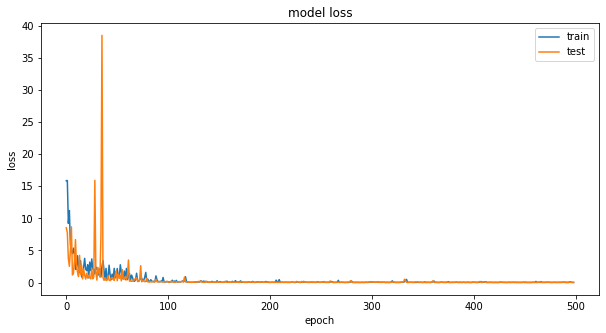

[[0.1 0.2 0.3]]
y actual value =  21.77
y predict value =  21.94859


In [103]:
config  = {
    'samples' : 1000,   # 100, 500, 1000
    'epoch' : 500,    # 100, 500, 1000
    'hidden_layer' : 3,     # [1,2,3] 중에 택 1
    'hidden' : 64,
    'activation' : 'relu'
}

model = gen_senquential_model(config)
X, y = gen_linear_regression_dataset(samples = config['samples'])
history = model.fit(X,y, epochs=config['epoch'], verbose=0, validation_split=0.3)

plot_loss_curve(history)

predict_new_sample(model, np.array([0.1, 0.2, 0.3]))